# Criação de sistema de regreção linear para determinar possiveis notas em exame em relaçao das variaveis dependentes obtidas

## Importação de biblioteca de data set a ser utilizado

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('../data/desenpenho_alunos.csv')
dados.head()

,Horas de Estudo,N Extracurriculares,Notas do Exame,Horas de Sono,Participação Tutorias
0,5,2,80,7.0,3
1,3,1,65,6.0,1
2,7,3,92,8.0,4
3,4,2,75,6.5,2
4,6,1,88,7.0,3


## Explorando inforções de dados

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Horas de Estudo        409 non-null    int64  
 1   N Extracurriculares    409 non-null    int64  
 2   Notas do Exame         409 non-null    int64  
 3   Horas de Sono          409 non-null    float64
 4   Participação Tutorias  409 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 16.1 KB


In [4]:
dados.shape

(409, 5)

In [5]:
dados.describe().round(2)

,Horas de Estudo,N Extracurriculares,Notas do Exame,Horas de Sono,Participação Tutorias
count,409.00,409.00,409.00,409.00,409.00
mean,5.35,2.15,79.89,6.98,2.61
std,1.81,1.03,10.26,0.70,1.24
min,2.00,1.00,59.00,6.00,1.00
25%,4.00,1.00,71.00,6.50,1.00
50%,5.00,2.00,79.00,7.00,3.00
75%,7.00,3.00,89.00,7.50,4.00
max,10.00,5.00,105.00,8.00,5.00


In [6]:
# removendo outliers em notas detectados pois nota maxima de exame ate 100
Q1 = dados['Notas do Exame'].quantile(0.25)
Q3 = dados['Notas do Exame'].quantile(0.75)
IQR = Q3 - Q1
df = dados[~((dados['Notas do Exame'] < (Q1 - 1.5 * IQR)) | (dados['Notas do Exame'] > (Q1 + 1.5 *IQR)))]

Q1 = dados['Horas de Estudo'].quantile(0.25)
Q3 = dados['Horas de Estudo'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((dados['Horas de Estudo'] < (Q1 - 1.5 * IQR)) | (dados['Horas de Estudo'] > (Q1 + 1.5 *IQR)))]
df.reset_index(inplace=True, drop=True)
df.describe().round(2)

,Horas de Estudo,N Extracurriculares,Notas do Exame,Horas de Sono,Participação Tutorias
count,395.00,395.00,395.00,395.00,395.00
mean,5.23,2.08,79.28,6.96,2.52
std,1.70,0.98,9.90,0.70,1.18
min,2.00,1.00,59.00,6.00,1.00
25%,4.00,1.00,71.00,6.50,1.00
50%,5.00,2.00,79.00,7.00,3.00
75%,7.00,3.00,89.00,7.50,4.00
max,8.00,4.00,96.00,8.00,5.00


In [7]:
df.corr().round(2)

,Horas de Estudo,N Extracurriculares,Notas do Exame,Horas de Sono,Participação Tutorias
Horas de Estudo,1.00,0.82,0.95,0.86,0.89
N Extracurriculares,0.82,1.00,0.80,0.79,0.81
Notas do Exame,0.95,0.80,1.00,0.89,0.95
Horas de Sono,0.86,0.79,0.89,1.00,0.90
Participação Tutorias,0.89,0.81,0.95,0.90,1.00


## Realizando analise grafico de dados

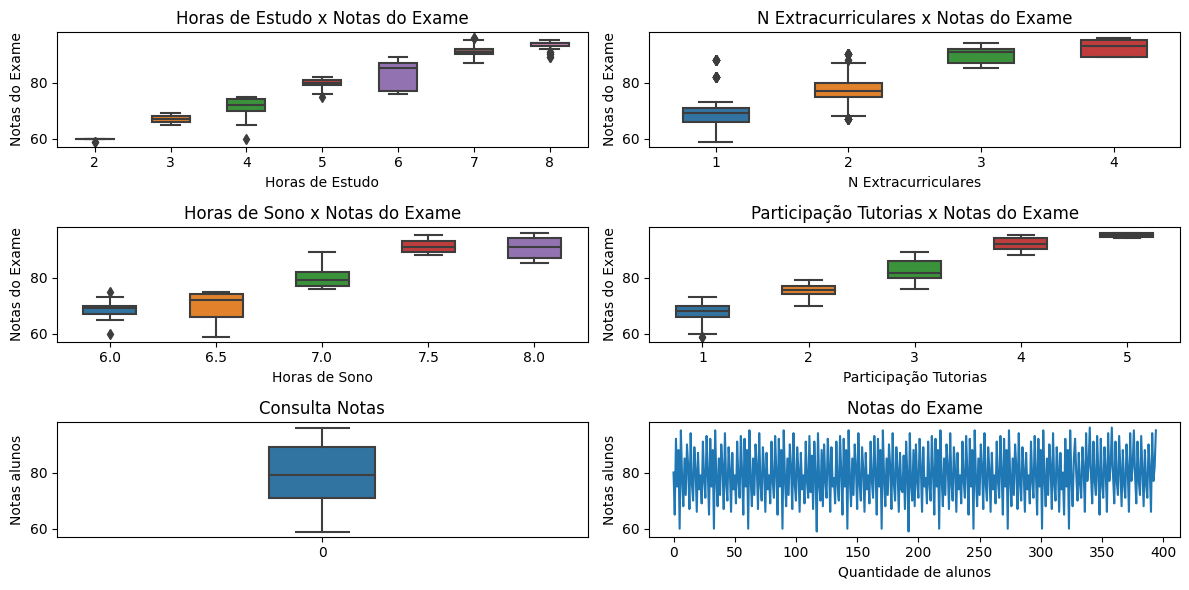

<Figure size 640x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots(3,2, figsize= (20, 6)) 

ax[2, 1].plot(df['Notas do Exame'])
ax[2, 1].set_title('Notas do Exame', fontsize=12) 
ax[2, 1].set_xlabel('Quantidade de alunos', fontsize= 10)
ax[2, 1].set_ylabel('Notas alunos', fontsize= 10)

sns.boxplot(data=df['Notas do Exame'], orient='v', width=0.2, ax=ax[2, 0])
ax[2, 0].figure.set_size_inches(12, 6)
ax[2, 0].set_title('Consulta Notas', fontsize = 12)
ax[2, 0].set_ylabel('Notas alunos', fontsize = 10)

variaveis = ['Horas de Estudo', 'N Extracurriculares', 'Horas de Sono', 'Participação Tutorias']
target = 'Notas do Exame'

for i, var in enumerate(variaveis):
    sns.boxplot(data=df, x=var, y=target, orient='v', width=0.5, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f'{var} x {target}', fontsize=12)
    ax[i // 2, i % 2].set_xlabel(var, fontsize=10)
    ax[i // 2, i % 2].set_ylabel(target, fontsize=10)

plt.tight_layout()
plt.show()

plt.subplots_adjust(hspace=0.7, wspace=0.3)

Text(0, 0.5, 'Quantidade de alunos')

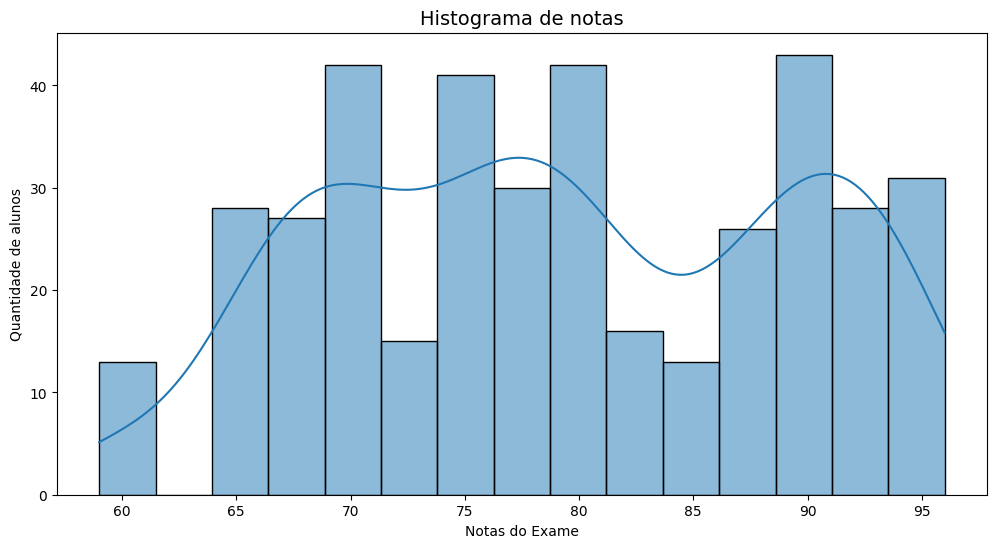

In [9]:
ax = sns.histplot(data=df['Notas do Exame'], kde=True, bins=15)
ax.figure.set_size_inches(12, 6)
ax.set_title('Histograma de notas', fontsize= 14)
ax.set_ylabel('Quantidade de alunos')

Text(0.5, 0.98, 'Dispersão entre variaveis')

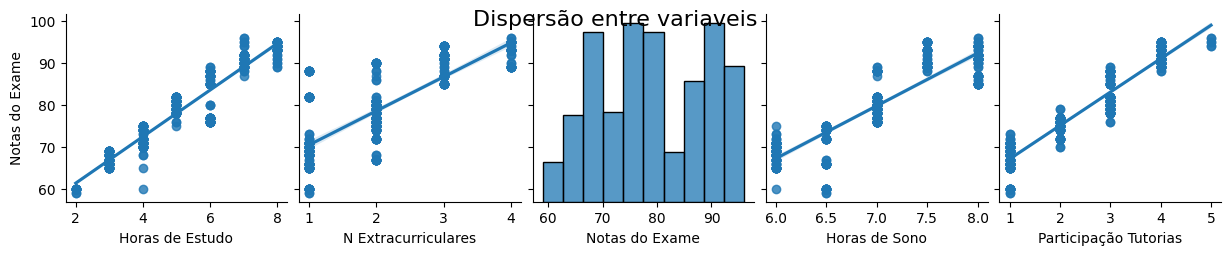

In [10]:
ax = sns.pairplot(data= df, y_vars='Notas do Exame',kind='reg')
ax.fig.suptitle('Dispersão entre variaveis', fontsize= 16)

## Criando modelo de regreção linear

In [11]:
y = df['Notas do Exame']
X = df[['Horas de Estudo', 'N Extracurriculares', 'Horas de Sono', 'Participação Tutorias']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

modelo = LinearRegression(fit_intercept=False)

In [12]:
modelo.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [13]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))
y_previsto = modelo.predict(X_test)
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))


R² = 0.89
R² = 0.88


In [28]:
Horas_de_Estudo = 5
N_Extracurriculares = 2
Horas_de_Sono = 8
Participação_Tutorias = 5


entrada = [[Horas_de_Estudo, N_Extracurriculares, Horas_de_Sono, Participação_Tutorias]]
prev = modelo.predict(entrada)[0]
limite_maximo = 100
previsoes_saturadas = np.minimum(prev, limite_maximo)
print('{0:.2f} é a nota no exame'. format(previsoes_saturadas) )

90.55 é a nota no exame
